# <font color='navy'> <b> Spojky </b> </font>

```{figure} ./img/banner.png
:width: 800px
:name: stmx_112
```

```{figure} ./img/image_brace.png
:width: 800px
:name: stmx_110

```

**Spojky** (Brace) sú základným konštrukčným typom dielov v *Stemfie-X* primárne určený pre spájanie dielov, ale je možné ich využiť aj ako konštrukčný prvok na vytváranie vystužených konštrukcií ako sú ramená žeriavov, robotov a pod. Spojky môžu obsahovať montážne otvory ako aj štrbiny. Štandardná hrúbka spojky je 1/4 **BU** (2.5mm), pomocou knižnice je možné programovo vytvárať spojky rôznych tvarov a konfigurácií. Lineárna spojka je rozmerovo kompatibilná s kovovými spojkami stavebníc *Meccano* a *Merkur*. 

## <font color='purple'> <b> Funkcie </b></font>

Základným typom je lineárna spojka *Brace*, oblúková spojka *Brace_Arc* a kruhová spojka *Brace_Circle*. Funkcie pre generovanie spojok majú formát

    Brace(size, height, holes, center)
    Brace_Arc(radius, angle, height, num_holes, center)
    Brace_Circle(radius, height, num_holes, center)
    
    Parametre       Default   Popis 
    --------------------------------------------------------------
    size            1         rozmery v počte otvorov 
    height          1         výška
    length          1         dĺžka 
    radius          5         polomer
    holes           True      lineárna spojka s otvormi / bez otvorov
    num_holes       4         počet montážnych otvorov
    angle           180       uhol v stupňoch
    center          True      poloha v strede súradnicovej sústavy 

    
### <font color='brown'> <b> Značenie dielov </b></font>

    brace_t_dd_hh_pp_ss[s]    basic form
    brace_t_dd_hh_pp          abbreviated forms, unlisted parameters have default values
    brace_t_dd_hh
    brace_t_dd

    t  - brace type                            dd - brace size               hh - brace height
         B - simple brace                           01 ... 99 BU                  01 =    1 BU
         C - circle brace                                                         ...
         A - arc brace                                                            10 =   10 BU
         X - user defined non standard brace                                      12 =  1/2 BU 
                                                                                  14 =  1/4 BU
        
    ss - number of slots                       pp - number of holes if it does not match the size
         00 ... 99                                  00 ... 99

        
    brace_B_dd_hh_pp_ss
        dd - brace size
        pp - number of holes
        ss - number of slots 
        
    brace_C_dd_hh_pp_ss
        dd - brace radius
        hh - brace height     
        pp - number of holes
        ss - number of slots (TODO, not implemented)

    brace_A_dd_hh_pp_sss
        dd  - brace radius
        hh  - brace height, default value is 1/4 BU      
        pp  - number of holes
        sss - brace angle in [deg] 001 ... 180
        
## <font color='purple'> <b> Použitie </b></font>

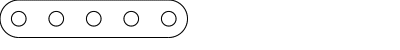

In [1]:
from lib import *

b = Brace(5)       # brace_B_05
show(b, 400,50)

### <font color='brown'> <b> Spojka so štrbinami </b></font>

Štrbiny požadovanej dĺžky vytvoríme pomocou triedy `Hole_Slot` a posunieme ich pomocou operátora **BU_Tx** na potrebnú pozíciu.

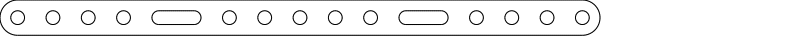

In [2]:
from lib import *

class Brace_B_17_14_13_02(Stemfie_X):   # length 17 BU , 1/4 BU height, 14 holes, 2 slots 
    def __init__(self):        
        b1 = Brace(17, holes=True)
        h1 = Hole_Slot(2, 1/2+1/4).BU_Tx(11)
        h2 = Hole_Slot(2, 1/2+1/4).BU_Tx(4)
        b1.D([h1, h2] )
        self.obj = b1.obj
        
b10 = Brace_B_17_14_13_02()
show(b10, 800, 50)

### <font color='brown'> <b> Oblúková spojka </b></font>

Výpočet oblúkovej spojky pri zadanej polohe počatku, konca oblúka a polomeru oblúka. Príklad pre 

* radius = 4 BU
* brace length = 7 BU

```{figure} ./img/comp_11.png
:width: 400px

Oblúková a lineárna spojka
```

Výpočet uhla a offsetu uhlovej spojky

```{figure} ./img/tetiva.png
:width: 300px

Tetiva oblúku
```

    R    - circle radius, in BU units
    D    - chord length in BU units, D >= 2*R+1

    beta - calculated angle
    H    - calculated offset

$$
\begin{align*}
\beta &= 2 \alpha      \\
\\
\frac{D-1}{2} &= R \cdot \sin(\alpha)    \\
\\
\beta &= 2 \alpha = 2 \cdot \arcsin \Big( \frac{D}{2R} \Big) \\
H &= R \cdot cos(\alpha) \\
\end{align*}
$$

Konštrukcia uhlovej spojky

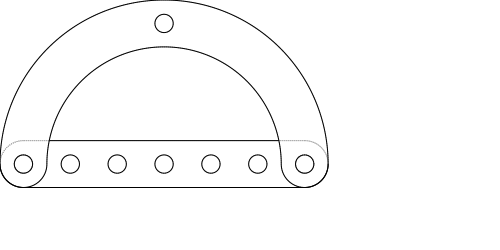

In [3]:
from lib import *
from lib.utils import *
from numpy import arcsin, pi

D = 7   # D >= 2*R+1  
R = 3   # arc radius

alpha = arcsin( (D-1) / (2*R ) )
beta = 2*alpha
H = R*cos(alpha)
bdeg = beta/pi*180     # convert rad -> deg

h = R*cos(alpha)
br1 = Brace_Arc(R, bdeg, 1/4, 3, center=True).Rz(90-bdeg/2).BU_T([0, -H, 0])
bb4 = Brace(D, center=True).BU_Tz(-1/2)

br1.U(bb4)
show(br1, 500, 250)